In [2]:
# %load init.py
#Init
import sys, os
if __package__ is None:
	import sys, os
	sys.path.append(os.path.realpath("../../"))
from CMS_SURF_2016.utils.callbacks import SmartCheckpoint
name = "lstm_benchmark"
max_features = 20000
max_length = 5
embedding_dim = 256
checkpoint = SmartCheckpoint(name,
    monitor='val_acc',
    verbose=1,
    save_best_only=True)


Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)

Couldn't import dot_parser, loading of dot files will not be possible.
Sucessfully loaded history at SmartCheckpoint/lstm_benchmark_history.json


In [3]:
# %load get_data.py
#Get_Data
from keras.datasets import imdb
from keras.preprocessing import sequence
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
X_train = sequence.pad_sequences(X_train, max_length)
X_test = sequence.pad_sequences(X_test, max_length)

Loading data...


In [4]:
# %load compile.py
#Compile
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=max_length, dropout=0.2))
model.add(LSTM(embedding_dim, dropout_W=0.2, dropout_U=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
# %load train.py
#Train
batch_size = 128
epochs = 5
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    nb_epoch=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint])

Train on 20000 samples, validate on 5000 samples
Sucessfully loaded history at SmartCheckpoint/lstm_benchmark_history.json
Sucessfully loaded weights at SmartCheckpoint/lstm_benchmark_weights.hdf5
Epoch 1/5
20000/20000 [==============================] - 32s - loss: 0.4064 - acc: 0.7838 - val_loss: 0.6725 - val_acc: 0.6552
Epoch 2/5
20000/20000 [==============================] - 32s - loss: 0.3903 - acc: 0.7923 - val_loss: 0.6724 - val_acc: 0.6584
Epoch 3/5
20000/20000 [==============================] - 32s - loss: 0.3784 - acc: 0.7998 - val_loss: 0.7232 - val_acc: 0.6506
Epoch 4/5
20000/20000 [==============================] - 32s - loss: 0.3716 - acc: 0.8007 - val_loss: 0.7134 - val_acc: 0.6464
Epoch 5/5
20000/20000 [==============================] - 32s - loss: 0.3588 - acc: 0.8069 - val_loss: 0.7701 - val_acc: 0.6534


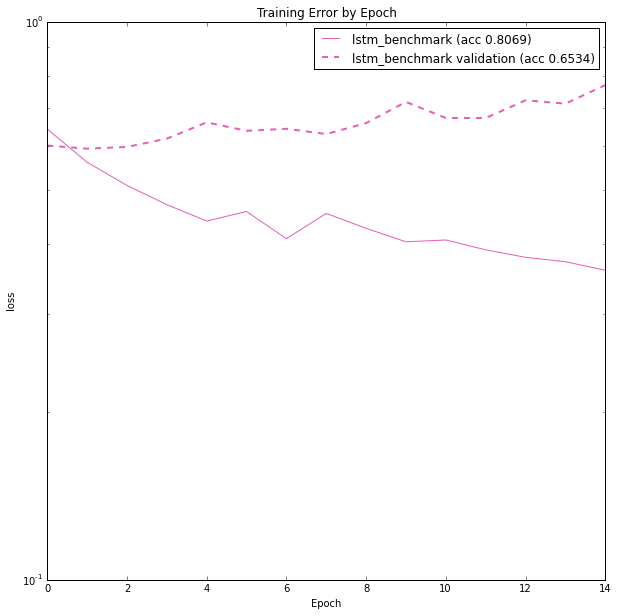

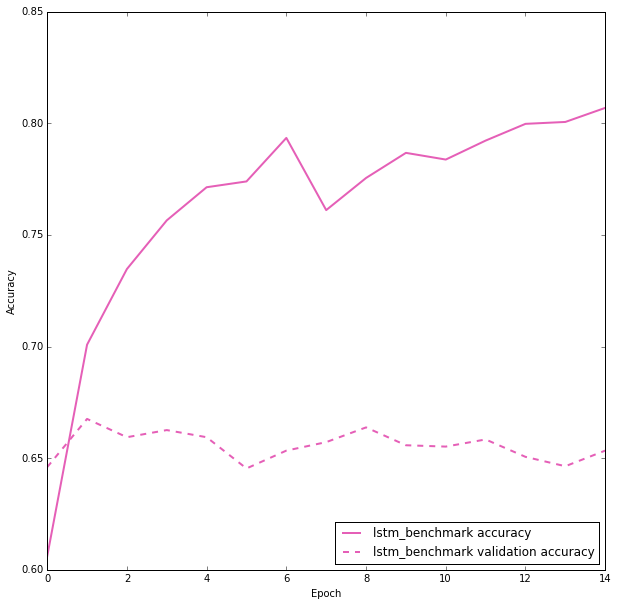

In [35]:
# %load view.py
#View
from CMS_SURF_2016.utils.metrics import plot_history
import json
from keras.callbacks import History
if 'checkpoint' in locals():
	hist = checkpoint.histobj	
	plot_history([("lstm_benchmark",hist)]);
else:
	print("Must initialize first")

In [6]:
type(model.layers[0].input)

theano.tensor.var.TensorVariable